# **Clustering**

## **Theory**

### **1. What is unsupervised learning in the context of machine learning?**
Unsupervised learning is a type of machine learning where the model is not provided with labeled training data. Instead, it tries to learn patterns, groupings, or structures from the input data on its own. Clustering and dimensionality reduction are common types of unsupervised learning tasks.

### **2. How does K-Means clustering algorithm work?**
- K-Means clustering aims to partition data into *k* clusters by minimizing the variance within each cluster. 
- Steps:
    1. Choose the number of clusters, *k*.
    2. Initialize *k* centroids randomly (or using K-Means++).
    3. Assign each data point to the nearest centroid.
    4. Recompute the centroids as the mean of the assigned points.
    5. Repeat steps 3–4 until convergence (centroids no longer change).

### **3. Explain the concept of a dendrogram in hierarchical clustering.**
A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering. It helps visualize how clusters are formed and at what level two clusters are joined. The vertical axis typically represents the distance or dissimilarity between clusters.

### **4. What is the main difference between K-Means and Hierarchical Clustering?**
The main difference between **K-Means** and **Hierarchical Clustering** lies in their approach and flexibility:

**K-Means Clustering**:
* **Approach**: Partition-based.
* **Number of Clusters**: You must specify the number of clusters (*k*) in advance.
* **Execution**: Iterative process — assigns points to *k* clusters and updates centroids.
* **Output**: Flat clustering (no hierarchy).
* **Scalability**: Efficient for large datasets.

**Hierarchical Clustering**:
* **Approach**: Tree-based (builds a hierarchy of clusters).
* **Number of Clusters**: No need to pre-specify; you can choose the level of the tree to cut.
* **Execution**: Merges or splits clusters recursively.
* **Output**: Dendrogram (tree structure showing nested clusters).
* **Scalability**: Computationally expensive for large datasets.

### **5. What are the advantages of DBSCAN over K-Means?**
- Does not require specifying the number of clusters.
- Can find clusters of arbitrary shape.
- Handles noise and outliers better than K-Means.
- Works well with data of varying densities.

### **6. When would you use Silhouette Score in clustering?**
Silhouette Score is used to evaluate the quality of clustering. It measures how similar a point is to its own cluster vs other clusters. It's helpful when comparing different clustering models or tuning parameters like *k* in K-Means.

### **7. What are the limitations of Hierarchical Clustering?**
- Computationally expensive (not scalable for large datasets).
- Once a merge/split is done, it cannot be undone.
- Sensitive to noise and outliers.
- Difficult to determine the number of clusters automatically.

### **8. Why is feature scaling important in clustering algorithms like K-Means?**
K-Means relies on Euclidean distance. If features are on different scales, those with larger ranges will dominate the distance calculation, leading to biased clustering. Feature scaling (e.g., standardization) ensures fair distance computation.

### **9. How does DBSCAN identify noise points?**

1. **Core Points**: A point is a **core point** if at least `minPts` points (including itself) are within its ε-neighborhood.
2. **Border Points**: A point that is within the ε-neighborhood of a core point but does **not** have enough neighbors to be a core point itself.
3. **Noise Points (Outliers)**: A point is labeled **noise** if:

   * It is **not** a core point.
   * It is **not** reachable from any core point (i.e., it lies outside all core point neighborhoods).


### **10. Define inertia in the context of K-Means.**
Inertia is the sum of squared distances between each point and its assigned cluster centroid. It measures how tightly the data points are clustered. Lower inertia indicates better clustering (but can decrease with increasing *k*).

### **11. What is the elbow method in K-Means clustering?**
The elbow method plots inertia against different values of *k*. The 'elbow point' where inertia starts decreasing slowly is chosen as the optimal number of clusters, balancing model complexity and performance.

### **12. Describe the concept of "density" in DBSCAN.**
In DBSCAN, density refers to the number of data points within a specified radius (ε). Points in high-density areas (having ≥ `min_samples` within ε) are grouped into clusters.

### **13. Can hierarchical clustering be used on categorical data?**
Yes, but standard hierarchical clustering requires a proper distance metric for categorical data, such as Hamming distance or Gower distance. Preprocessing or encoding may also be needed.

### **14. What does a negative Silhouette Score indicate?**
A negative Silhouette Score means the sample is likely assigned to the wrong cluster, as it is closer on average to points in another cluster than to those in its own cluster.

### **15. Explain the term "linkage criteria" in hierarchical clustering.**
Linkage criteria define how the distance between clusters is computed. Common types:
- **Single linkage**: Minimum distance between points across clusters.
- **Complete linkage**: Maximum distance.
- **Average linkage**: Average distance.
- **Ward's method**: Minimizes variance within clusters.

### **16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?**
K-Means assumes spherical, equally-sized clusters. It struggles with:
- Varying densities (clusters with different compactness).
- Varying sizes (small vs large clusters).
- Non-spherical shapes.

### **17. What are the core parameters in DBSCAN, and how do they influence clustering?**
- **ε (epsilon)**: Radius of neighborhood around a point.
- **min_samples**: Minimum number of points required to form a dense region.
These control the sensitivity of DBSCAN. Smaller ε = more clusters & noise; larger ε = fewer clusters.

### **18. How does K-Means++ improve upon standard K-Means initialization?**
K-Means++ chooses initial centroids more intelligently:
1. First centroid randomly.
2. Next centroids chosen with probability proportional to distance squared from nearest existing centroid.
This leads to better initial centroids and faster convergence.

### **19. What is agglomerative clustering?**
Agglomerative clustering is a bottom-up hierarchical method. It starts with each data point as its own cluster and merges the closest pair of clusters step by step until all points are in a single cluster or the desired number of clusters is reached.

### **20. What makes Silhouette Score a better metric than just inertia for model evaluation?**
Inertia only decreases with increasing *k*, providing no clear guidance. Silhouette Score considers both intra-cluster compactness and inter-cluster separation, offering a more interpretable evaluation of clustering quality.

## **Practical**

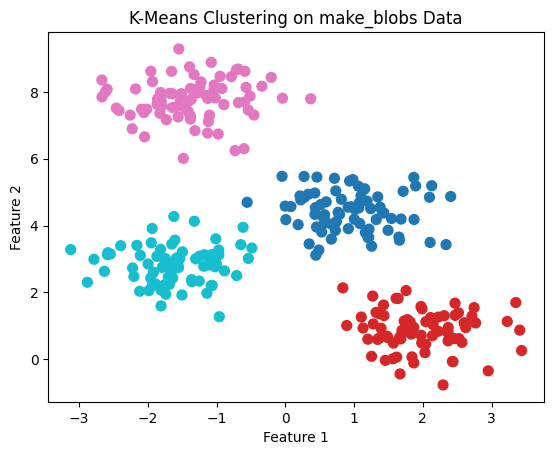

In [1]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X_blobs)

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_kmeans, s=50, cmap='tab10')
plt.title("K-Means Clustering on make_blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [2]:

# 22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X_iris = iris.data

agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(X_iris)

print("First 10 Agglomerative Clustering Labels:", y_agg[:10])


First 10 Agglomerative Clustering Labels: [1 1 1 1 1 1 1 1 1 1]


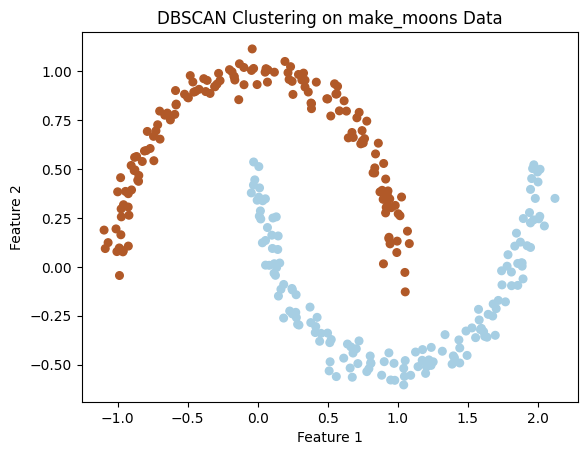

In [3]:
# 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_db = dbscan.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_db, cmap='Paired', s=30)
plt.title("DBSCAN Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
# 24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)

kmeans_wine = KMeans(n_clusters=3, random_state=0)
y_kmeans_wine = kmeans_wine.fit_predict(X_wine)

sizes = pd.Series(y_kmeans_wine).value_counts().sort_index()
print("Cluster Sizes:\n", sizes)

Cluster Sizes:
 0    65
1    51
2    62
Name: count, dtype: int64


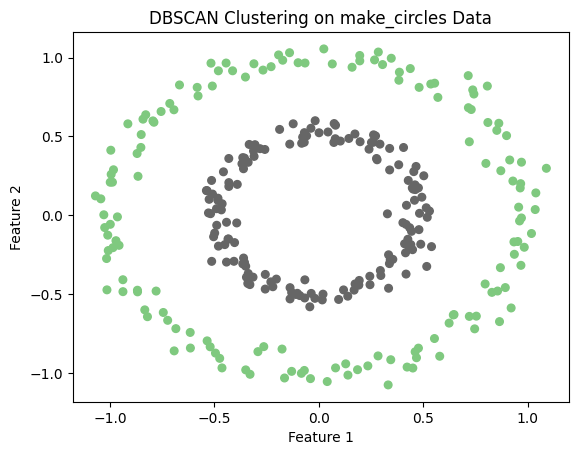

In [5]:
# 25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
from sklearn.datasets import make_circles

X_circles, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

dbscan_circles = DBSCAN(eps=0.2, min_samples=5)
y_dbscan_circles = dbscan_circles.fit_predict(X_circles)

plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_dbscan_circles, cmap='Accent', s=30)
plt.title("DBSCAN Clustering on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [6]:
# 26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X)

print("Cluster Centroids (scaled):")
print(kmeans.cluster_centers_)

Cluster Centroids (scaled):
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


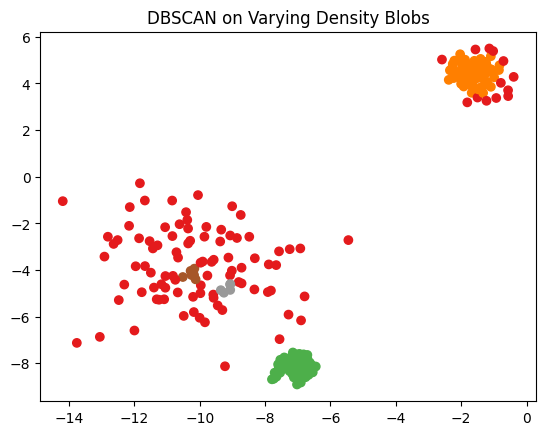

In [7]:
# 27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

x_varied, _ = make_blobs(n_samples=300, cluster_std=[0.5, 1.5, 0.3], centers=3, random_state=1)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(x_varied)

plt.scatter(x_varied[:, 0], x_varied[:, 1], c=labels, cmap='Set1')
plt.title("DBSCAN on Varying Density Blobs")
plt.show()

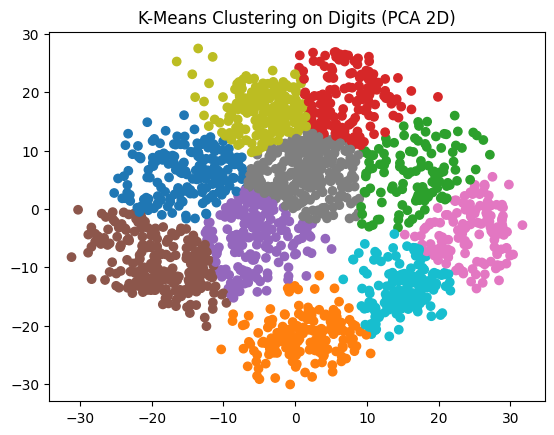

In [8]:
# 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
x_pca = PCA(n_components=2).fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=1)
labels = kmeans.fit_predict(x_pca)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='tab10')
plt.title("K-Means Clustering on Digits (PCA 2D)")
plt.show()

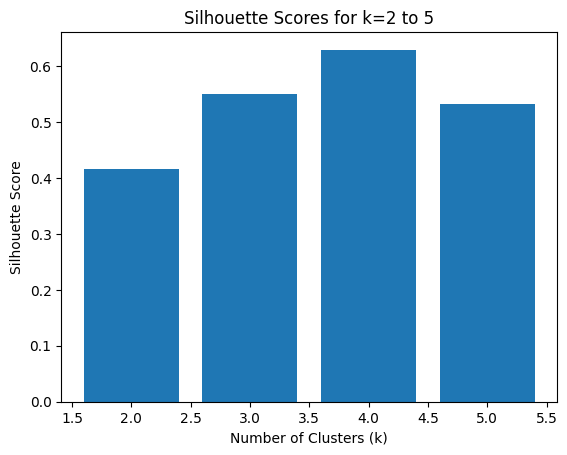

In [9]:
# 29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

x_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=0)
scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x_blobs)
    score = silhouette_score(x_blobs, kmeans.labels_)
    scores.append(score)

plt.bar(range(2, 6), scores)
plt.title("Silhouette Scores for k=2 to 5")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

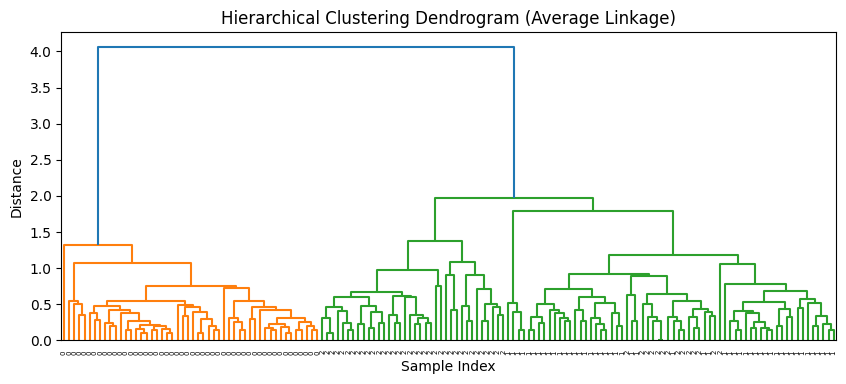

In [10]:
# 30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_iris

iris = load_iris()
Z = linkage(iris.data, method='average')

plt.figure(figsize=(10, 4))
dendrogram(Z, labels=iris.target)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

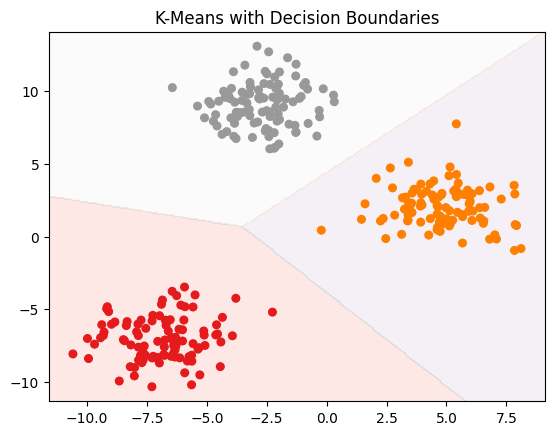

In [11]:
# 31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
from sklearn.datasets import make_blobs
import numpy as np

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)
kmeans = KMeans(n_clusters=3).fit(X)

x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='Set1', s=30)
plt.title("K-Means with Decision Boundaries")
plt.show()

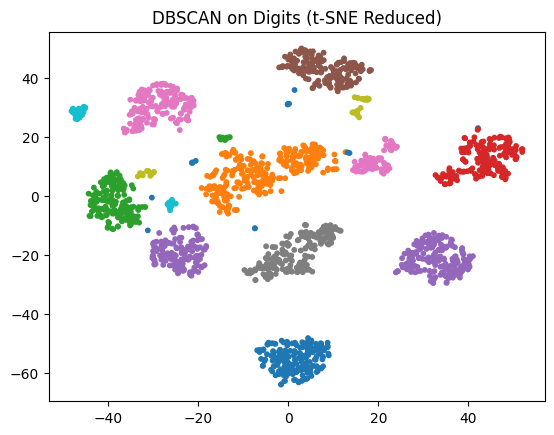

In [12]:
# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()

X_tsne = TSNE(n_components=2, random_state=0).fit_transform(digits.data)
dbscan_digits = DBSCAN(eps=3, min_samples=5)
labels = dbscan_digits.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10)
plt.title("DBSCAN on Digits (t-SNE Reduced)")
plt.show()

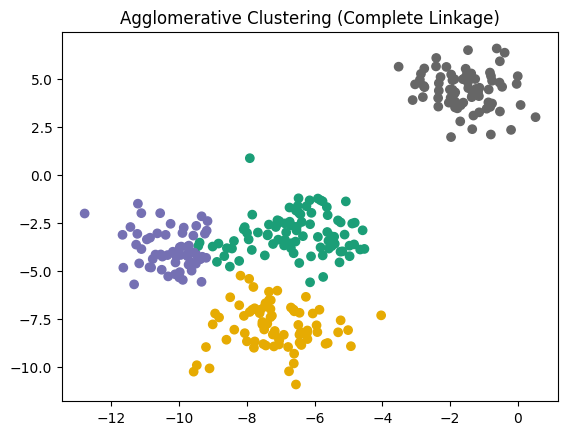

In [13]:
# 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X_blob2, _ = make_blobs(n_samples=300, centers=4, random_state=1)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X_blob2)

plt.scatter(X_blob2[:, 0], X_blob2[:, 1], c=labels, cmap='Dark2')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

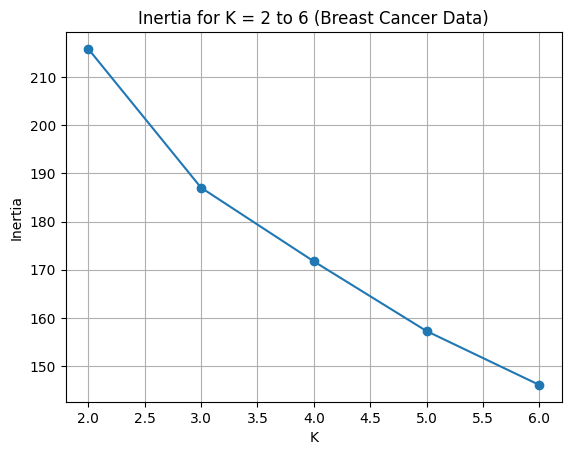

In [14]:
# 34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot
X_bc = MinMaxScaler().fit_transform(data.data)
inertias = []
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=1).fit(X_bc)
    inertias.append(model.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.title("Inertia for K = 2 to 6 (Breast Cancer Data)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

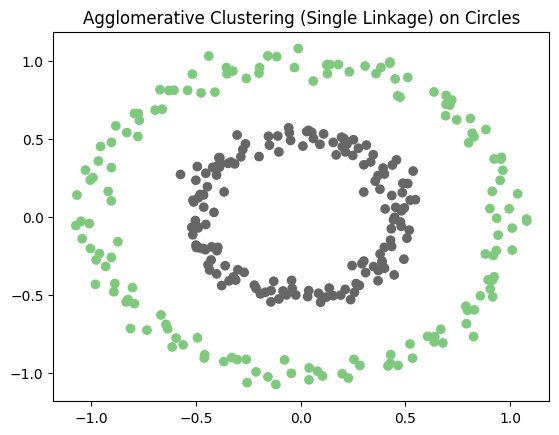

In [15]:
# 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
X_circ, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
agg_single = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_single.fit_predict(X_circ)

plt.scatter(X_circ[:, 0], X_circ[:, 1], c=labels, cmap='Accent')
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()

In [16]:
# 36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)
wine_data = load_wine()
X_wine_scaled = StandardScaler().fit_transform(wine_data.data)

dbscan_wine = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan_wine.fit_predict(X_wine_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 0


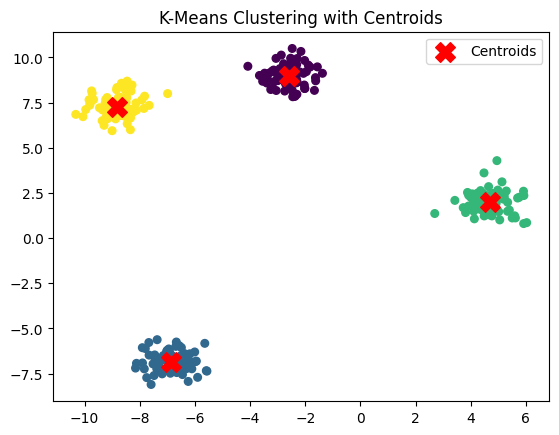

In [17]:
# 37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering with Centroids")
plt.legend()
plt.show()

In [18]:
# 38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)

dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_iris)

n_noise = np.sum(labels == -1)
print("Number of noise samples:", n_noise)

Number of noise samples: 26


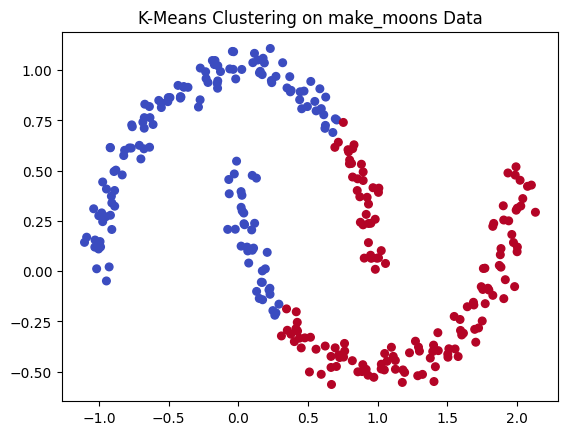

In [19]:
# 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels, cmap='coolwarm', s=30)
plt.title("K-Means Clustering on make_moons Data")
plt.show()

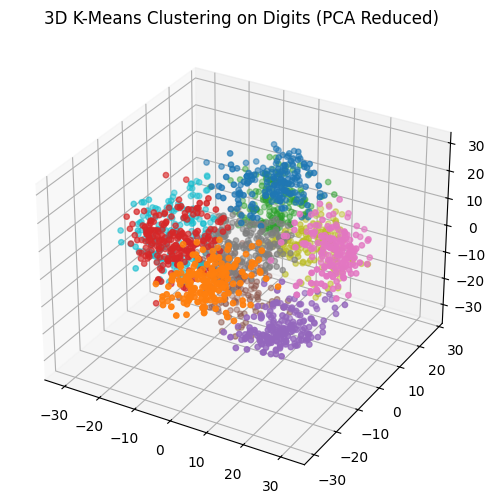

In [20]:
# 40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

digits = load_digits()
X_pca_3d = PCA(n_components=3).fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca_3d)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='tab10', s=15)
ax.set_title("3D K-Means Clustering on Digits (PCA Reduced)")
plt.show()

In [21]:
# 41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score for 5-cluster KMeans:", round(score, 3))

Silhouette Score for 5-cluster KMeans: 0.799


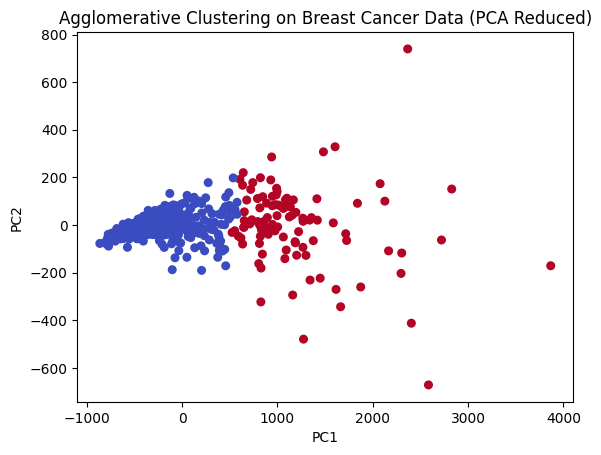

In [22]:
# 42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

data = load_breast_cancer()
X_pca = PCA(n_components=2).fit_transform(data.data)

agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', s=30)
plt.title("Agglomerative Clustering on Breast Cancer Data (PCA Reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

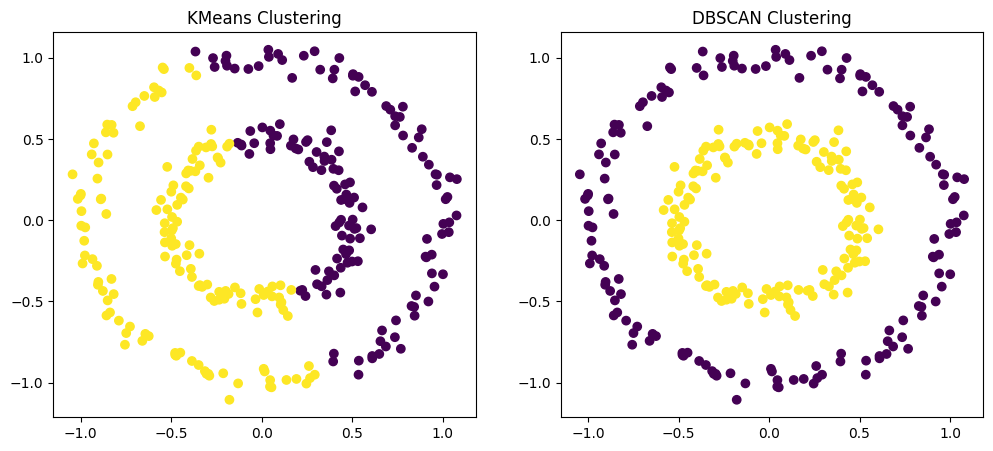

In [23]:
# 43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels_km = kmeans.labels_

dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels_db = dbscan.labels_

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=labels_km, cmap='viridis')
axs[0].set_title("KMeans Clustering")
axs[1].scatter(X[:, 0], X[:, 1], c=labels_db, cmap='viridis')
axs[1].set_title("DBSCAN Clustering")
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_9200\2006377635.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(silhouette_vals)), y=silhouette_vals, palette="coolwarm")


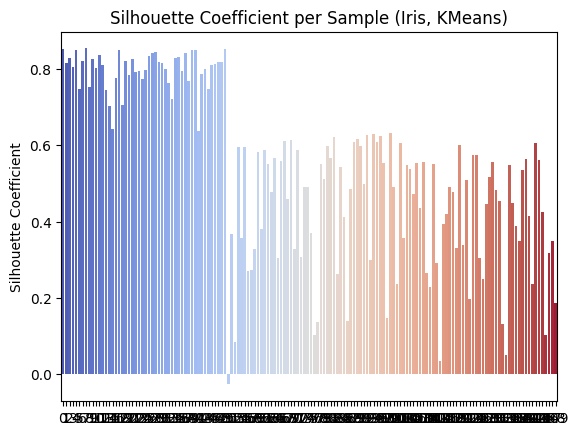

In [24]:
# 44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
from sklearn.metrics import silhouette_samples
import seaborn as sns

iris = load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)

silhouette_vals = silhouette_samples(X, labels)
sns.barplot(x=np.arange(len(silhouette_vals)), y=silhouette_vals, palette="coolwarm")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient per Sample (Iris, KMeans)")
plt.show()

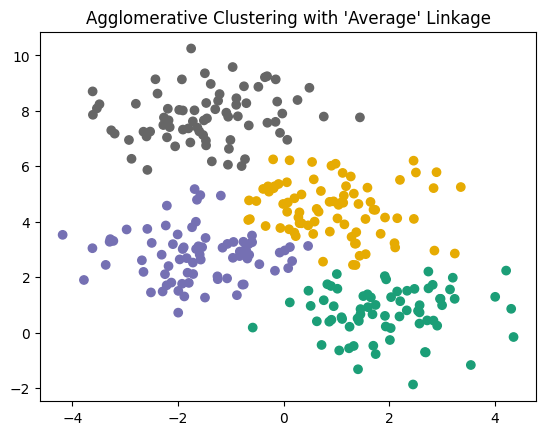

In [25]:
# 45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters
X_blob, _ = make_blobs(n_samples=300, centers=4, random_state=0)
agg_avg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels_avg = agg_avg.fit_predict(X_blob)

plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labels_avg, cmap='Dark2')
plt.title("Agglomerative Clustering with 'Average' Linkage")
plt.show()


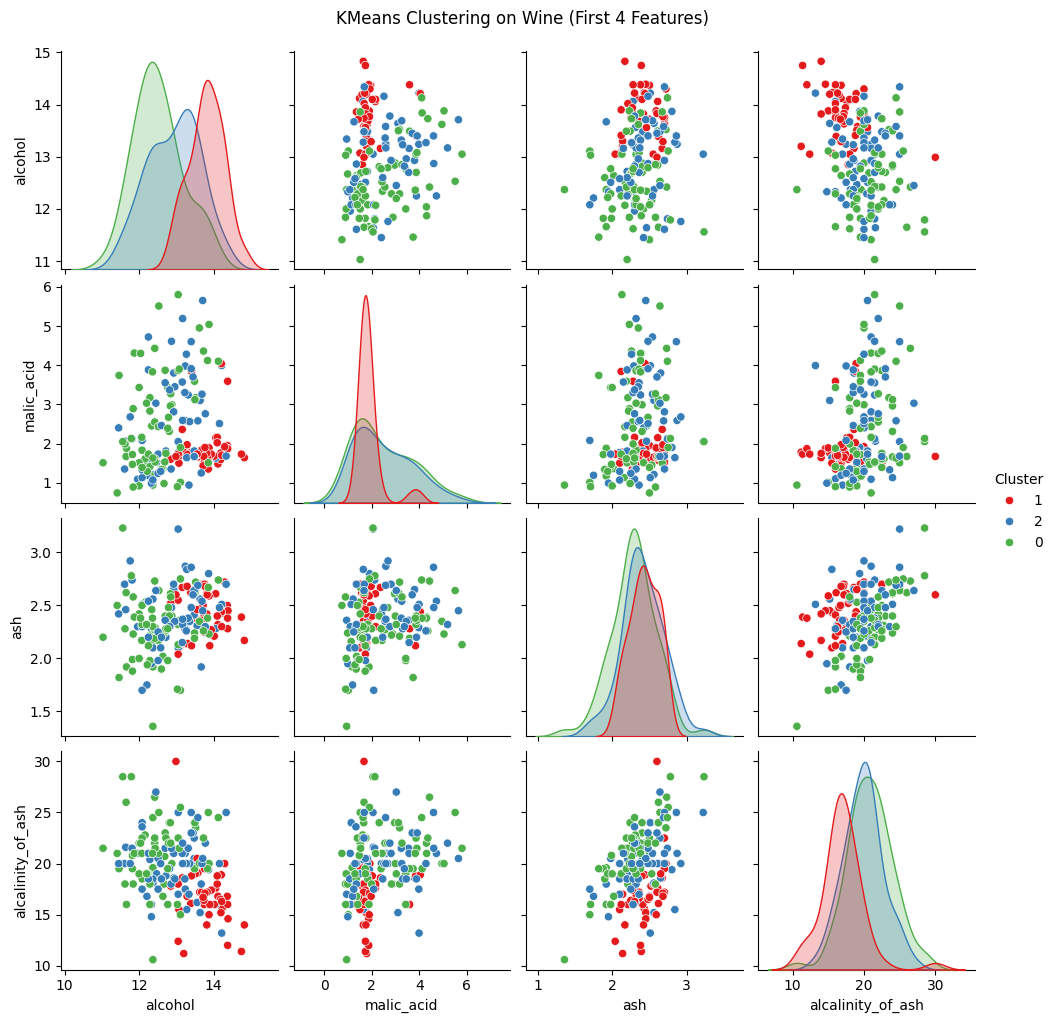

In [26]:
# 46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)


wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['cluster'] = KMeans(n_clusters=3, random_state=0).fit_predict(wine.data)

sns.pairplot(df.iloc[:, :4].assign(Cluster=df['cluster'].astype(str)), hue='Cluster', palette='Set1')
plt.suptitle("KMeans Clustering on Wine (First 4 Features)", y=1.02)
plt.show()

In [27]:
# 47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count
X_noise, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.2, random_state=42)
db = DBSCAN(eps=0.8, min_samples=5).fit(X_noise)

labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Clusters found:", n_clusters)
print("Noise points:", n_noise)

Clusters found: 3
Noise points: 29


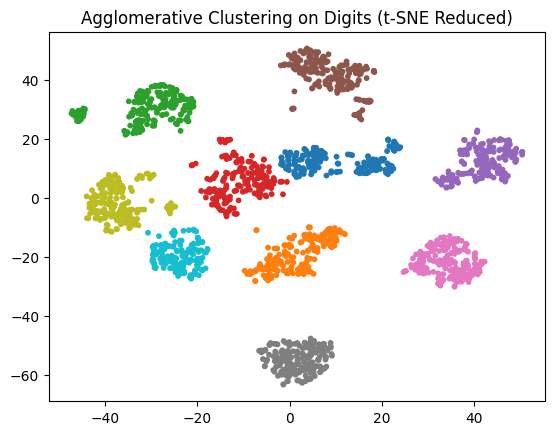

In [28]:
# 48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10)
plt.title("Agglomerative Clustering on Digits (t-SNE Reduced)")
plt.show()